# First iteration of model - all static values

The first to be defined is a state space, here being set to be discrete values. 
Then the Agent class is defined to set an initial state and a method to "consider" it's state options and possibly changing it's state. 

In [1]:
states = [1, 0] #1 being cooperating, 0 being defecting



class Agent:
    def __init__(self, state):
        self.state = state
        self.interactionsReceived = 0
        self.interactionsGiven = 0
    
    def consider(self, neighbour):
        self.interactionsReceived +=1
        neighbour.addInteractionGiven()
        weight = self.state*0.8 + politicalClimate + defectorUtility + neighboursWeight*neighbour.state
        
        if(weight > 0):
            self.state = states[0]
        else:
            self.state = states[1]
    
    def addInteractionGiven(self):
        self.interactionsGiven +=1
        

The model class consists of the agents and includes a method to make these interact. 

In [2]:
from numpy.random import choice
import random
import matplotlib.pyplot as plt

class Model:
    def __init__(self):
        #Time dependent topology
        self.graph = nx.Graph()
    
    def interact(self):
        nodeIndex = random.randint(0, len(self.graph) - 1)
        node = self.graph.nodes[nodeIndex]['agent']
        
        neighbours =  list(self.graph.adj[nodeIndex].keys())
        
        chosenNeighbourIndex = neighbours[random.randint(0, len(neighbours)-1)]
        chosenNeighbour = self.graph.nodes[chosenNeighbourIndex]['agent']
        
        node.consider(chosenNeighbour)
        
        
    def countCooperatorRatio(self):
        count = 0
        for node in self.graph:
            if self.graph.nodes[node]['agent'].state== 1:
                count+=1
        return count/len(self.graph)
        
        

In [3]:
import networkx as nx

def makeGridModel(n):
    model = Model()
    for i in range(n):
        for j in range (n):
            agent1 = Agent(states[random.randint(0,1)])
            model.graph.add_node(i*n+j, agent=agent1)
            if(i!=0):
                model.graph.add_edge(i*n+j, (i-1)*n+j)
            if(j!=0):
                model.graph.add_edge(i*n+j, i*n+j-1)
    
    return model

In [4]:
import matplotlib.pyplot as plt



def draw_model(model):

    color_map = []
    for node in model.graph:
        if model.graph.nodes[node]['agent'].state== 1:
            color_map.append('green')
        else: color_map.append('red')   
    
    plt.subplot(121)
    nx.draw_spectral(model.graph, node_color = color_map,)



In [5]:
def simulate(n, k, drawModel = False):
    model = makeGridModel(n)
    if(drawModel):
        draw_model(model)
    ratio = []
    
    for i in range(k):
        model.interact()
        ratio.append(model.countCooperatorRatio())
                    
    if(drawModel):
        plt.subplot(122)
        plt.plot(ratio)
        plt.ylabel('Cooperators in %')
        plt.show()

    return (model, ratio)

In [6]:
def batch_simulate(n,k,s):
    batch_proportions=[]
    for i in range(s):
        (model, proportion) = simulate(n, k)
        batch_proportions.append(proportion)
    return batch_proportions

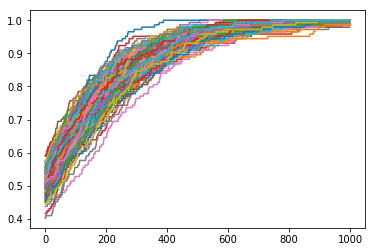

In [10]:
defectorUtility = -0.5 
 
politicalClimate=0.2 #Being environment-positive -- Adding some random number being events in life lik emovies etc.

neighboursWeight = 0.5 # or adding randomness here
    
results= batch_simulate(12, 1000, 100)
for i in results:
    plt.plot(i)





c:\users\sigrid\appdata\local\programs\python\python36\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


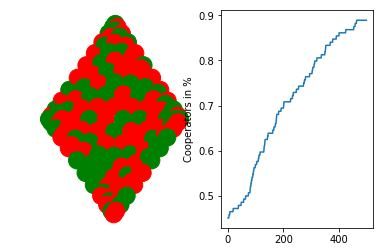

In [8]:
(model, ratio) = simulate(12, 500, True)

0.8888888888888888


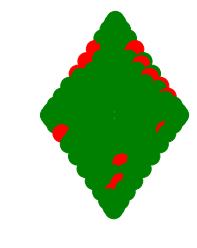

In [15]:
draw_model(model)
print(model.countCooperatorRatio())
#type(nx.draw_spectral(model.graph))